Author: __Antonio Vecoli__

Date: __12/06/2017__

__Tech For Space__  [www.techforspace.com](https://www.techforspace.com/)

__License: MIT License__

For any technical or Python support please refer to our [__Project Page__](https://www.techforspace.com/project/sentinels-earth-observation/)


# Handling a Sentinel-2 product with SNAP in Python (Tutorial 3)

__Reference S-2 product for the tutorial__ : 

https://scihub.copernicus.eu/dhus/odata/v1/Products('c94ebae2-3b0d-4472-96a0-324bb54d7bdf')/$value


It can happen that a user needs to process only part of a whole Sentinel-2 product, to focus on a certain geographical region and also to reduce the amount of time that would be necessary to implement some data processing. The operation to extract a portion of a S-2 product is called subsetting and it has been included in SNAP with a dedicated GPF operator that will be described here. The obtained product could be then used in a larger processing chain for further analysis or saved as an independent new data product. That will be introduced in the last part of this tutorial.

## Subsetting a Sentinel2 data product

As just said, the subsetting operation is implemented by a GPF operator that has to be applied to the whole S-2 data product, but the main requirement is that all the rasters should have the same size. This means that before invoking the subset operator, the S-2 product should be resampled with a certain resolution. 
The user can look into Tutorial 2 to understand the following lines of code to implement the S-2 resampling process:

In [1]:
from snappy import ProductIO
from snappy import jpy
from snappy import GPF

file_path = 'C:\Program Files\snap\S2A_MSIL1C_20170202T090201_N0204_R007_T35SNA_20170202T090155.SAFE\MTD_MSIL1C.xml'
product = ProductIO.readProduct(file_path)

HashMap = jpy.get_type('java.util.HashMap')  
parameters = HashMap()
parameters.put('targetResolution',60)
result = GPF.createProduct('Resample', parameters, product)


The user could now verify some property of the result, for example extracting the raster size of one band or getting the list of all the bands.
The obtained product is now ready for the extraction of the subset. The next step is the definition of the subset operator to extract a region of interest from the whole S-2 product:

<img src="SNAP_subset.jpg">

The subset operator has to be set in a different way, if compared with the resampling operator. First of all it is necessary to invoke the operator and to define the geometry of the subset, that should be described according to the __Geometry__ Java class ([com.vividsolutions.jts.geom.Geometry](http://tsusiatsoftware.net/jts/javadoc/com/vividsolutions/jts/geom/Geometry.html)). The coordinates of the polygon can be extracted directly from the desktop version of SNAP full view using other GIS applications.

SubsetOp = jpy.get_type('org.esa.snap.core.gpf.common.SubsetOp')
WKTReader =jpy.get_type('com.vividsolutions.jts.io.WKTReader')

Now for the implementation of the operator the geometry has to be defined and associated to the object of class Geometry:

In [3]:
wkt = 'POLYGON ((27.350865857300093 36.824908050376905, 27.76637805803395 36.82295594263548, 27.76444424458719 36.628100558767244, 27.349980428973755 36.63003894847389, 27.350865857300093 36.824908050376905))'
geometry = WKTReader().read(wkt)


Once the geometry has been  properly defined, the subset operator can be invoked with its object constructor, and then it will be possible to call its methods that will allow to set the geometry object and the source product:

In [4]:
op = SubsetOp()
op.setSourceProduct(result)
op.setGeoRegion(geometry)
sub_product = op.getTargetProduct()
print("subset product ready")

subset product ready


Now __sub_product__ is the new data product obtained from the source S-2 product. We are going to verify the result by showing the list of available bands, and visualizing one of them.

In [6]:
list(result.getBandNames())

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B9',
 'B10',
 'B11',
 'B12',
 'view_zenith_mean',
 'view_azimuth_mean',
 'sun_zenith',
 'sun_azimuth',
 'view_zenith_B1',
 'view_azimuth_B1',
 'view_zenith_B2',
 'view_azimuth_B2',
 'view_zenith_B3',
 'view_azimuth_B3',
 'view_zenith_B4',
 'view_azimuth_B4',
 'view_zenith_B5',
 'view_azimuth_B5',
 'view_zenith_B6',
 'view_azimuth_B6',
 'view_zenith_B7',
 'view_azimuth_B7',
 'view_zenith_B8',
 'view_azimuth_B8',
 'view_zenith_B8A',
 'view_azimuth_B8A',
 'view_zenith_B9',
 'view_azimuth_B9',
 'view_zenith_B10',
 'view_azimuth_B10',
 'view_zenith_B11',
 'view_azimuth_B11',
 'view_zenith_B12',
 'view_azimuth_B12']

band read
('subset size : ', 619L, 362L)
reading data...


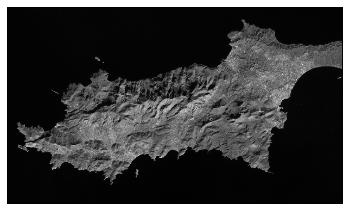

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

sub_b6 = sub_product.getBand('B6')
print("band read")
width = sub_b6.getRasterWidth()
height = sub_b6.getRasterHeight()
print("subset size : ", width, height)
sub_b6_data = np.zeros(width*height, dtype = np.float32)
sub_b6.readPixels(0,0,width,height, sub_b6_data)
sub_b6_data.shape = height, width
print("reading data...")
plt.figure(1)
fig = plt.imshow(sub_b6_data, cmap = cm.gray)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

So the band has been properly displayed and that confirms that the subsetting operation has been successful. The last step is now to see how it could be possible to save this subset as an independent new product. It won't be possible to write a new S-2 product because this option is not available yet in the current SNAP release. Anyway there are various formats available to save our product and make it available for further processings.Here the new subset will be saved as a _BEAM-DIMAP_ product that has a _.dim_ extension. The product writing operation could require various minutes:

In [15]:
ProductIO.writeProduct(sub_product, 'snappy_subset_output.dim', 'BEAM-DIMAP')
print("subset product written")

subset product written


At the end of this process the user can verify the presence of the new product in the working directory of the jupyter notebook and he could try to open it as it has been explained so far in these tutorials.